## Exact diagonalization of Magic ETH Hamiltonian

In [24]:
from DMRG.Ising import Hamilton_TL
from DMRG.spin import sigma

In [94]:
def polarization(psi, L):
    l = np.empty([L, 3])
    for i in range(L):
        psi = psi.reshape((2**i, 2, 2**(L-i-1)))
        for k in range(3):
            rho = np.einsum("ijk, imk->jm", psi, psi.conj())
            l[i, k] = np.sum(rho.T*sigma[k+1]).real
    return l

In [165]:
def ETH_polarization(L, markersize=4):
    H = Hamilton_TL(L)['H']
    w, v = eigh(H)
    P = np.empty([2**L, L, 3])
    for i in range(2**L):
        P[i] = polarization(v[:, i], L)
    P2 = np.sum(P**2, axis=(1, 2))/L

    plot(w, P2, '.', markersize=markersize);
    grid();
    ylim(0, 1)
    xlabel(r'$E$')
    ylabel(r'$|n|^2$')
    title(r'Average polarization $|n|^2$ of $L={}$ chain'.format(L))
    savefig('polar-L={}.pdf'.format(L))

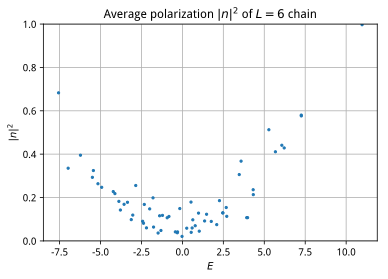

In [166]:
ETH_polarization(6, 4.5)

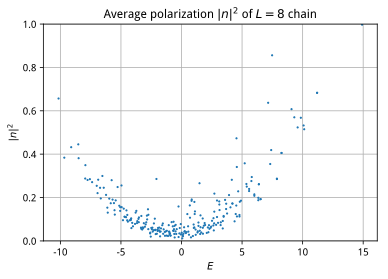

In [167]:
ETH_polarization(8, 2.5)

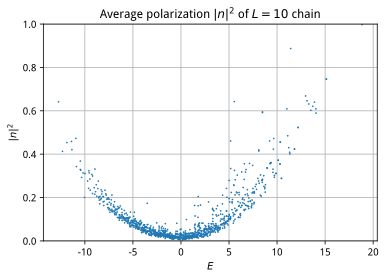

In [168]:
ETH_polarization(10, 1.5)

In [169]:
def energy_spectrum(L, markersize=4):
    H = Hamilton_TL(L)['H']
    w, v = eigh(H)
    plot(w, '.', markersize=markersize);
    grid();
    xlabel(r'$n$')
    ylabel(r'$E_n$')
    title(r'Energy spectrum for $L={}$'.format(L))
    savefig('spectrum-L={}.pdf'.format(L))

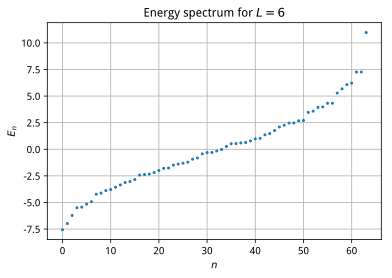

In [170]:
energy_spectrum(6);

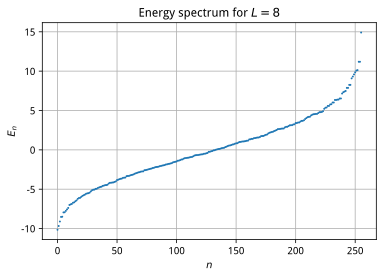

In [171]:
energy_spectrum(8, 2);

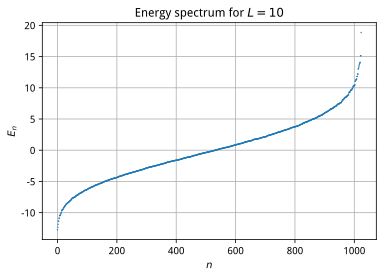

In [172]:
energy_spectrum(10, 1);